# Premilinary EDA - Scoping of Project

## Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [11]:
df = pd.read_csv('US_Accidents_Dec21_updated.csv', low_memory = False)

## Check counties with "King" 

In [4]:
df_temp = df[df['County'].str.contains('king', case = False)]
df_temp['County'].unique().tolist()

['Licking',
 'Muskingum',
 'Hocking',
 'Kings',
 'King George',
 'King William',
 'Rockingham',
 'King and Queen',
 'Buckingham',
 'King And Queen',
 'King',
 'Kingfisher',
 'Kingman',
 'Kingsbury',
 'Brookings']

## Filtering dataset for King County

In [5]:
df_king  = df.loc[df['County'] == 'King', :]

In [6]:
df_king.loc[:, 'year'] = df_king.loc[:, 'Start_Time'].apply(lambda x: x[:4])

c:\Users\akshit73\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\Users\akshit73\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


## Checking Year Breakdown

In [7]:
df_king['year'].value_counts()

2021    4856
2020    2623
2017    2440
2018    2302
2019    2177
2016    1505
Name: year, dtype: int64

## Missing Value Analysis 

In [8]:
df_king.isna().sum().reset_index()

,index,0
0,ID,0
1,Severity,0
2,Start_Time,0
3,End_Time,0
4,Start_Lat,0
5,Start_Lng,0
6,End_Lat,0
7,End_Lng,0
8,Distance(mi),0
9,Description,0


In [9]:
df_king.loc[df_king['Precipitation(in)'].isnull(), :]['year'].value_counts()

2018    1847
2017    1748
2016    1094
2019     454
2020      11
2021       3
Name: year, dtype: int64

In [10]:
df_king['Severity'].value_counts()

2    12106
3     2325
4     1180
1      292
Name: Severity, dtype: int64

In [14]:
df_king['Start_Time'] = pd.to_datetime(df_king['Start_Time'])
df_king['End_Time'] = pd.to_datetime(df_king['End_Time'])

<ipython-input-14-861fd85382cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_king['Start_Time'] = pd.to_datetime(df_king['Start_Time'])
<ipython-input-14-861fd85382cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_king['End_Time'] = pd.to_datetime(df_king['End_Time'])


In [31]:
df_king['weekday'] = df_king['Start_Time'].dt.weekday

<ipython-input-31-b370188de813>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_king['weekday'] = df_king['Start_Time'].dt.weekday


In [33]:
df_king['hours'] = df_king['Start_Time'].dt.hour

<ipython-input-33-cea750eaf2b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_king['hours'] = df_king['Start_Time'].dt.hour


In [65]:
df_king[['Bump','Crossing','Stop', 'Sunrise_Sunset']]

,Bump,Crossing,Stop,Sunrise_Sunset
103863,False,False,False,Night
103878,False,True,False,Night
103879,False,False,False,Night
103923,False,False,False,Night
103942,False,False,False,Night
...,...,...,...,...
2845161,False,False,False,Night
2845182,False,False,False,Day
2845191,False,False,False,Day
2845209,False,False,False,Day


In [34]:
df_king.to_csv('US_Accidents_King_County.csv', index = False)

(array([  26053.,       0.,       0., 2532991.,       0.,       0.,
         155105.,       0.,       0.,  131193.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

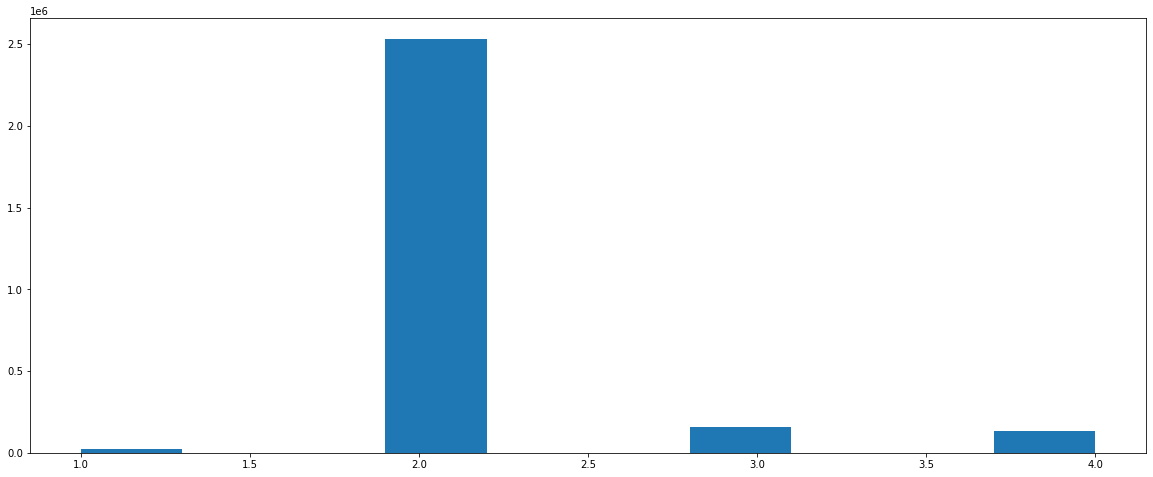

In [66]:
plt.figure(figsize=(20, 8))
plt.hist(df['Severity'])